In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [2]:
run_id = 'Algorithm1_apple_etc'

In [3]:
os.mkdir(run_id)

In [4]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [54]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [7]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')
predict = predict.get_close()

In [8]:
predict_req, real = data_prep(predict, 24, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [9]:
individual_predictors_forecasts = individual_predictors_pretrained1(predict_req, 30)

### System disagreement between individual predictor forecasts

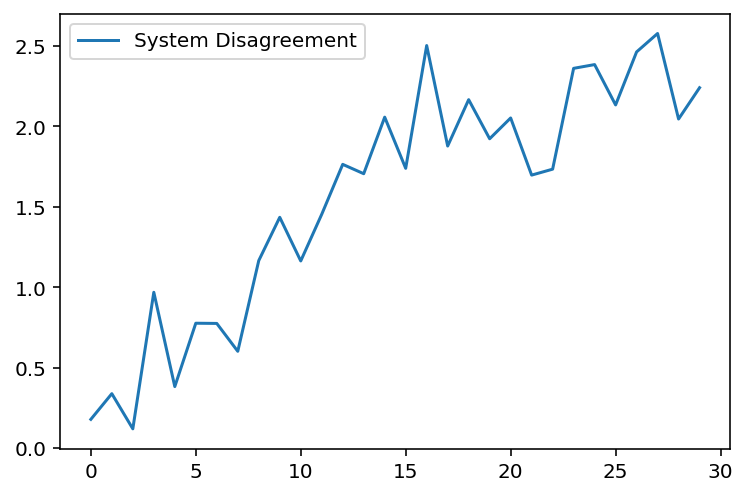

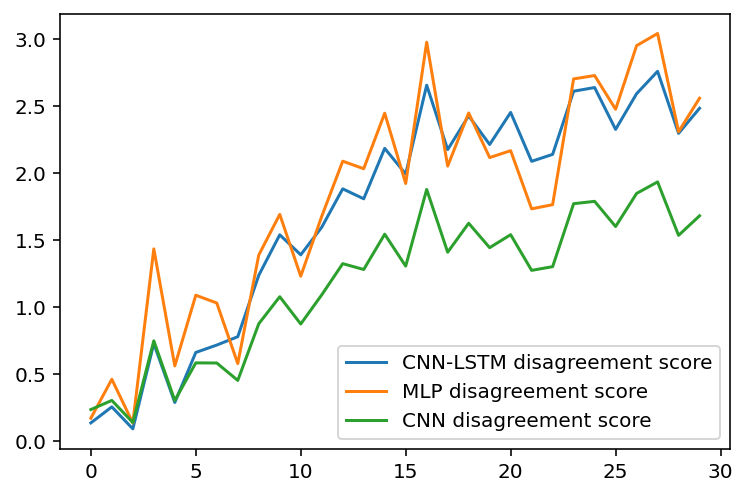

In [10]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [55]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [56]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [57]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Real Value,CNN-LSTM,MLP,CNN,System Disagreement,CNN-LSTM disagreement score,MLP disagreement score,CNN disagreement score
Date,,,,,,,,,,,,,
2010-07-06,9.051994,9.051994,9.051994,9.051994,9.483421,8.879643,9.116774,9.221597,8.817613,0.179548,0.134661,0.169602,0.234382
2010-07-07,9.110713,9.031743,9.071228,8.808110,9.340637,9.238214,8.952804,9.571225,8.808110,0.339162,0.254372,0.460512,0.302603
2010-07-08,8.722270,8.728712,8.714512,8.725756,8.431196,9.217500,8.725756,8.856209,8.584846,0.120606,0.090454,0.133939,0.137424
2010-07-09,9.249494,9.347883,9.224029,10.683270,10.790977,9.272143,8.563080,10.683270,8.502132,0.969394,0.727046,1.433776,0.747362
2010-07-12,8.519753,8.454921,8.498789,8.261903,7.789010,9.188929,8.261903,9.079777,8.217581,0.383198,0.287399,0.560023,0.302173
2010-07-13,8.624244,8.850559,8.628281,9.712100,9.445558,8.992857,7.963663,9.712100,8.196969,0.777083,0.660581,1.087856,0.582812
2010-07-14,8.394703,8.443032,8.404864,9.424383,8.567613,9.026071,7.678870,9.424383,8.080855,0.775784,0.715833,1.029680,0.581838
2010-07-15,7.716483,7.833301,7.738162,8.293983,7.715157,8.980357,6.938310,8.293983,7.917155,0.602522,0.778173,0.577501,0.451891
2010-07-16,7.949222,8.177801,8.012546,9.337017,9.250903,8.925000,6.712652,9.337017,7.797997,1.166385,1.236570,1.387795,0.874788


In [14]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [58]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,CNN-LSTM absolute error,MLP absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,CNN-LSTM disagreement score,MLP disagreement score,CNN disagreement score,System Disagreement
Date,,,,,,,,,,,,
2010-07-06,0.237130,0.341953,0.062031,0.172351,0.172351,0.172351,0.172351,0.603778,0.134661,0.169602,0.234382,0.179548
2010-07-07,0.285410,0.333012,0.430103,0.127501,0.206471,0.166986,0.430103,0.102423,0.254372,0.460512,0.302603,0.339162
2010-07-08,0.491744,0.361291,0.632654,0.495230,0.488788,0.502988,0.491744,0.786304,0.090454,0.133939,0.137424,0.120606
2010-07-09,0.709064,1.411126,0.770011,0.022649,0.075740,0.048115,1.411126,1.518834,0.727046,1.433776,0.747362,0.969394
2010-07-12,0.927026,0.109152,0.971348,0.669175,0.734007,0.690140,0.927026,1.399918,0.287399,0.560023,0.302173,0.383198
2010-07-13,1.029194,0.719243,0.795888,0.368613,0.142298,0.364576,0.719243,0.452701,0.660581,1.087856,0.582812,0.777083
2010-07-14,1.347200,0.398313,0.945215,0.631368,0.583039,0.621207,0.398313,0.458458,0.715833,1.029680,0.581838,0.775784
2010-07-15,2.042048,0.686374,1.063202,1.263874,1.147056,1.242195,0.686374,1.265200,0.778173,0.577501,0.451891,0.602522
2010-07-16,2.212348,0.412017,1.127003,0.975778,0.747199,0.912454,0.412017,0.325903,1.236570,1.387795,0.874788,1.166385


In [16]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,CNN-LSTM absolute error,MLP absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,CNN-LSTM disagreement score,MLP disagreement score,CNN disagreement score,System Disagreement
CNN-LSTM absolute error,1.000000,0.055681,0.983315,0.972877,0.901081,0.941513,-0.049855,0.381910,0.967450,0.871826,0.926756,0.928823
MLP absolute error,0.055681,1.000000,0.061051,0.062161,0.107236,0.077564,0.925541,0.147852,0.044096,0.033601,0.035968,0.038489
CNN absolute error,0.983315,0.061051,1.000000,0.970595,0.907253,0.943003,-0.010532,0.442123,0.936503,0.855508,0.901454,0.904537
Average absolute error,0.972877,0.062161,0.970595,1.000000,0.972002,0.991817,-0.020970,0.519672,0.882896,0.740901,0.817581,0.820118
NoMemory absolute error,0.901081,0.107236,0.907253,0.972002,1.000000,0.986382,0.050374,0.626651,0.767479,0.589714,0.681709,0.685332
Memory absolute error,0.941513,0.077564,0.943003,0.991817,0.986382,1.000000,0.002881,0.572607,0.827152,0.665040,0.749098,0.753249
Focus absolute error,-0.049855,0.925541,-0.010532,-0.020970,0.050374,0.002881,1.000000,0.180569,-0.079722,-0.076793,-0.086426,-0.080861
Anchor absolute error,0.381910,0.147852,0.442123,0.519672,0.626651,0.572607,0.180569,1.000000,0.205948,0.061735,0.129809,0.134525
CNN-LSTM disagreement score,0.967450,0.044096,0.936503,0.882896,0.767479,0.827152,-0.079722,0.205948,1.000000,0.960987,0.989418,0.990330
MLP disagreement score,0.871826,0.033601,0.855508,0.740901,0.589714,0.665040,-0.076793,0.061735,0.960987,1.000000,0.989374,0.989970


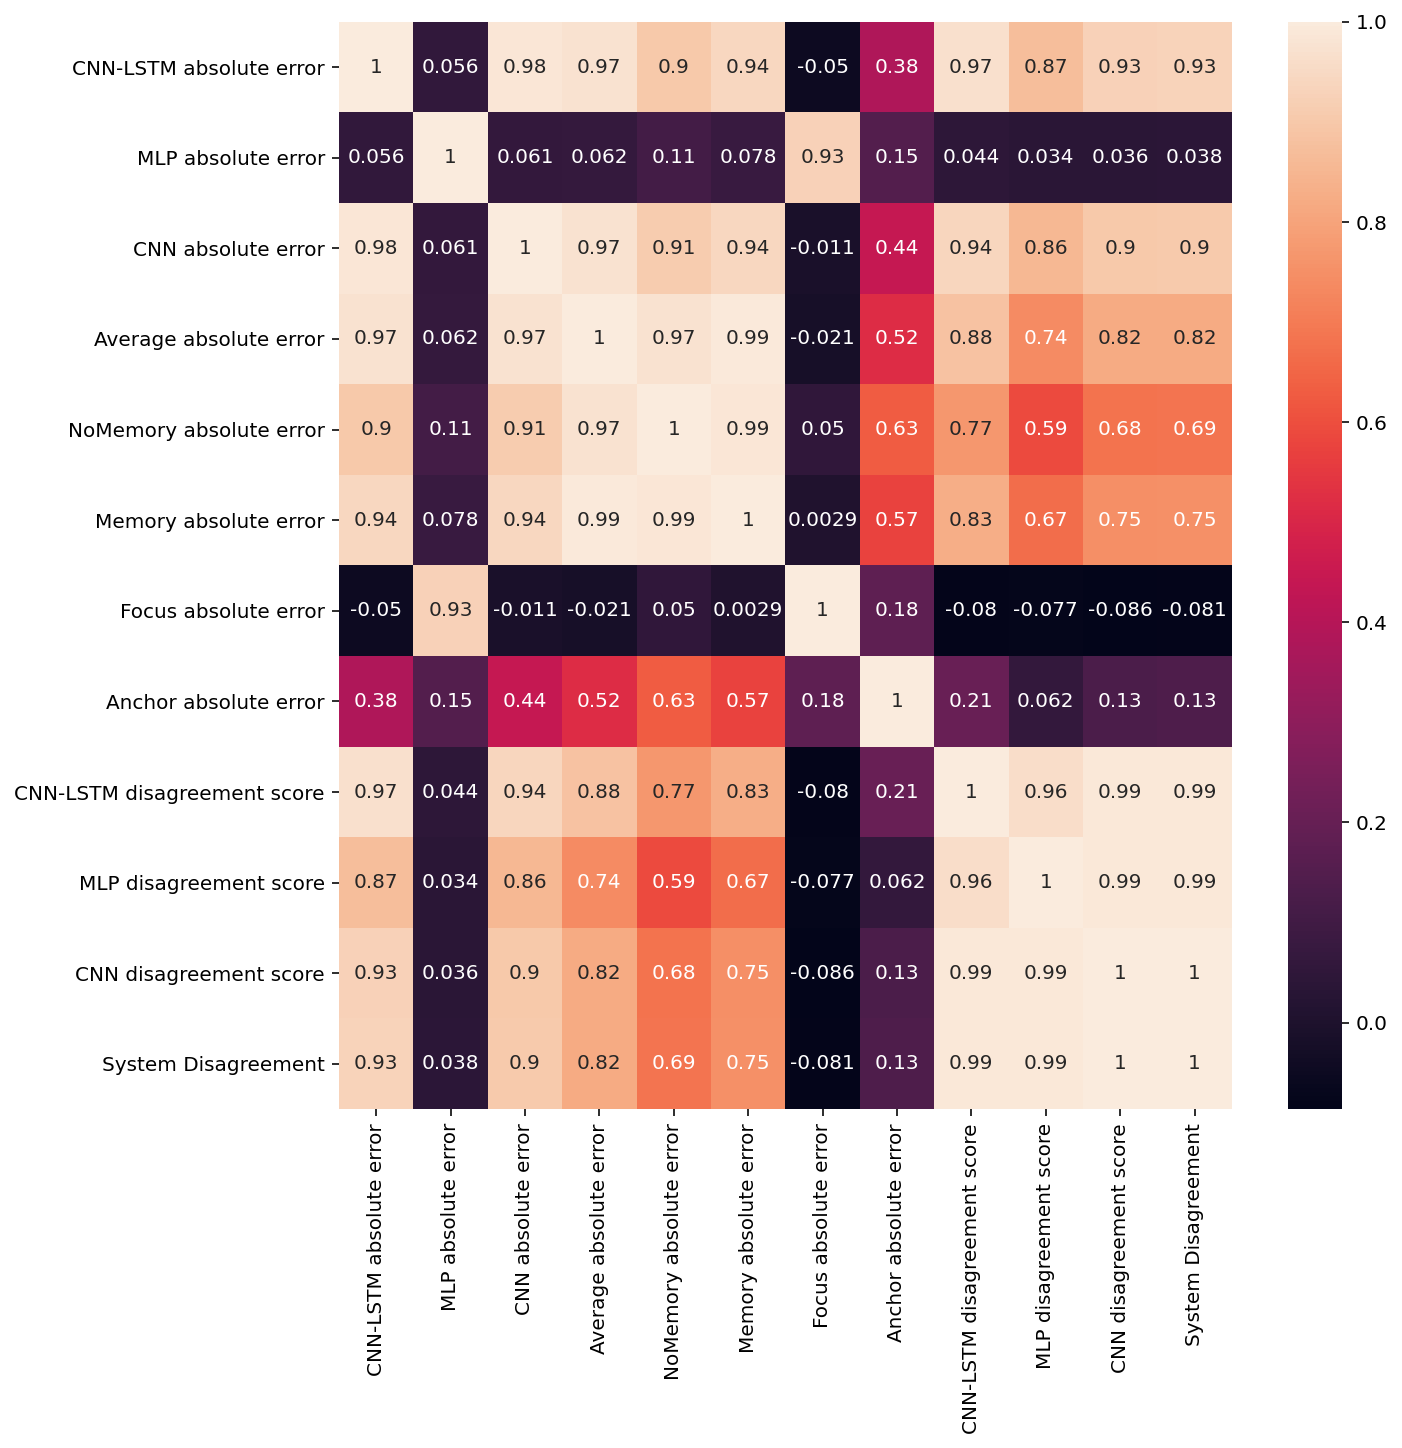

In [59]:
correlation_ = correlation(prediction_error, True)
correlation_

In [20]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MAE, MSE and MSE log scores

,Algorithms,MSE
0,Average,3.929127
1,NoMemory,2.222062
2,Memory,2.829538
3,Focus,0.457158
4,Anchor,1.480713
5,CNN-LSTM,14.893194
6,MLP,0.425638
7,CNN,4.074368


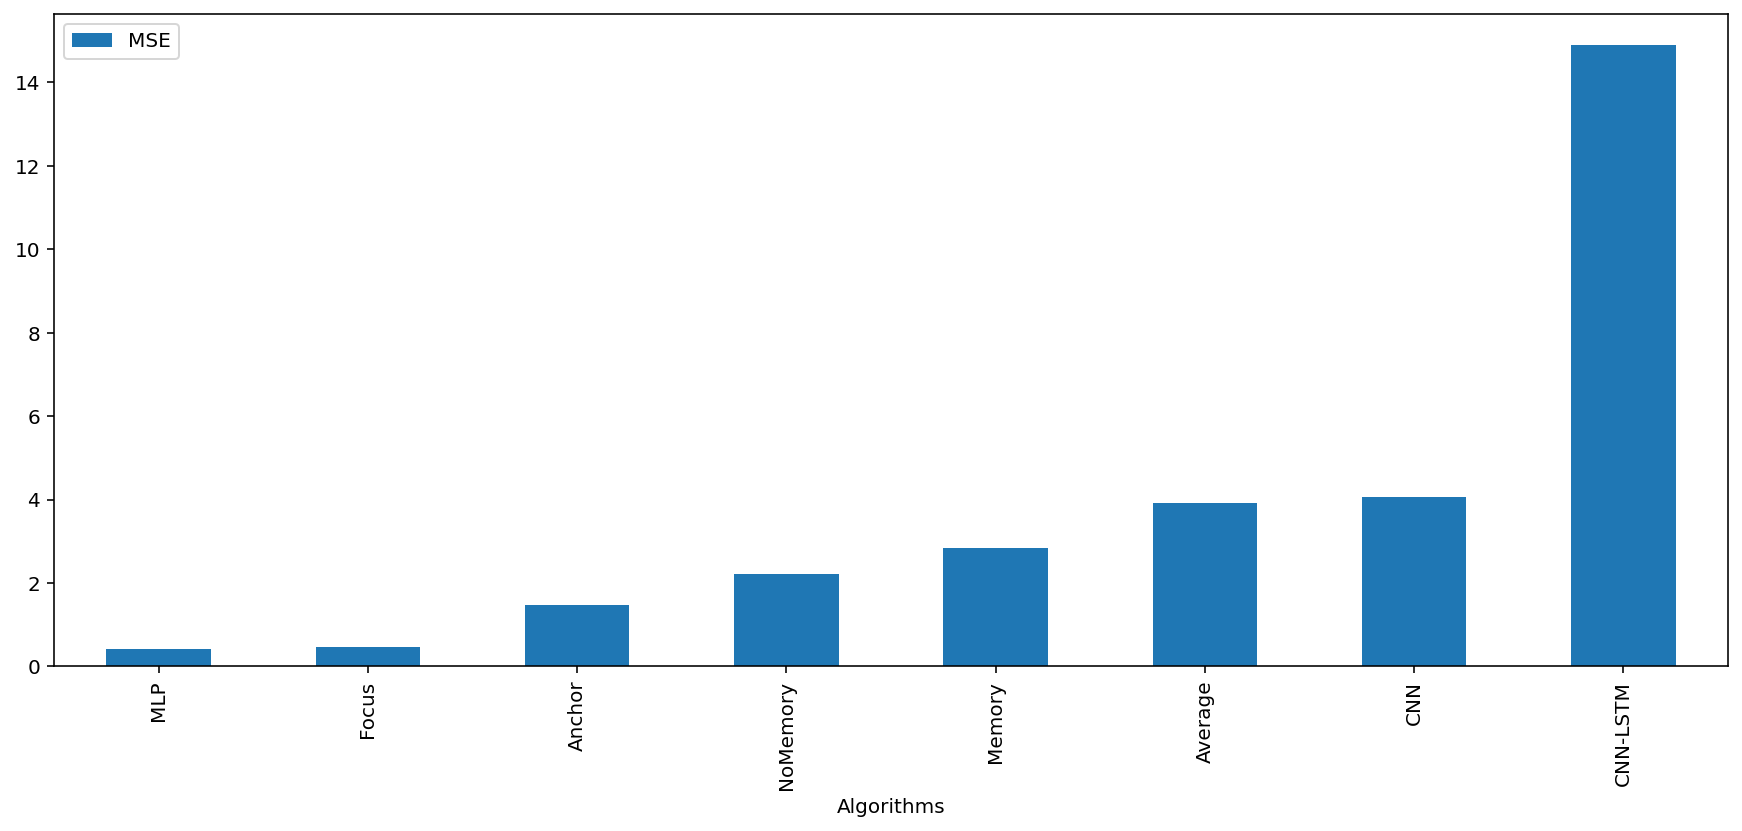

In [60]:
mse = mse_score(all_forecasts, True)
mse

In [22]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.049239
1,NoMemory,0.026024
2,Memory,0.033840
3,Focus,0.004464
4,Anchor,0.016604
5,CNN-LSTM,0.257301
6,MLP,0.004128
7,CNN,0.050827


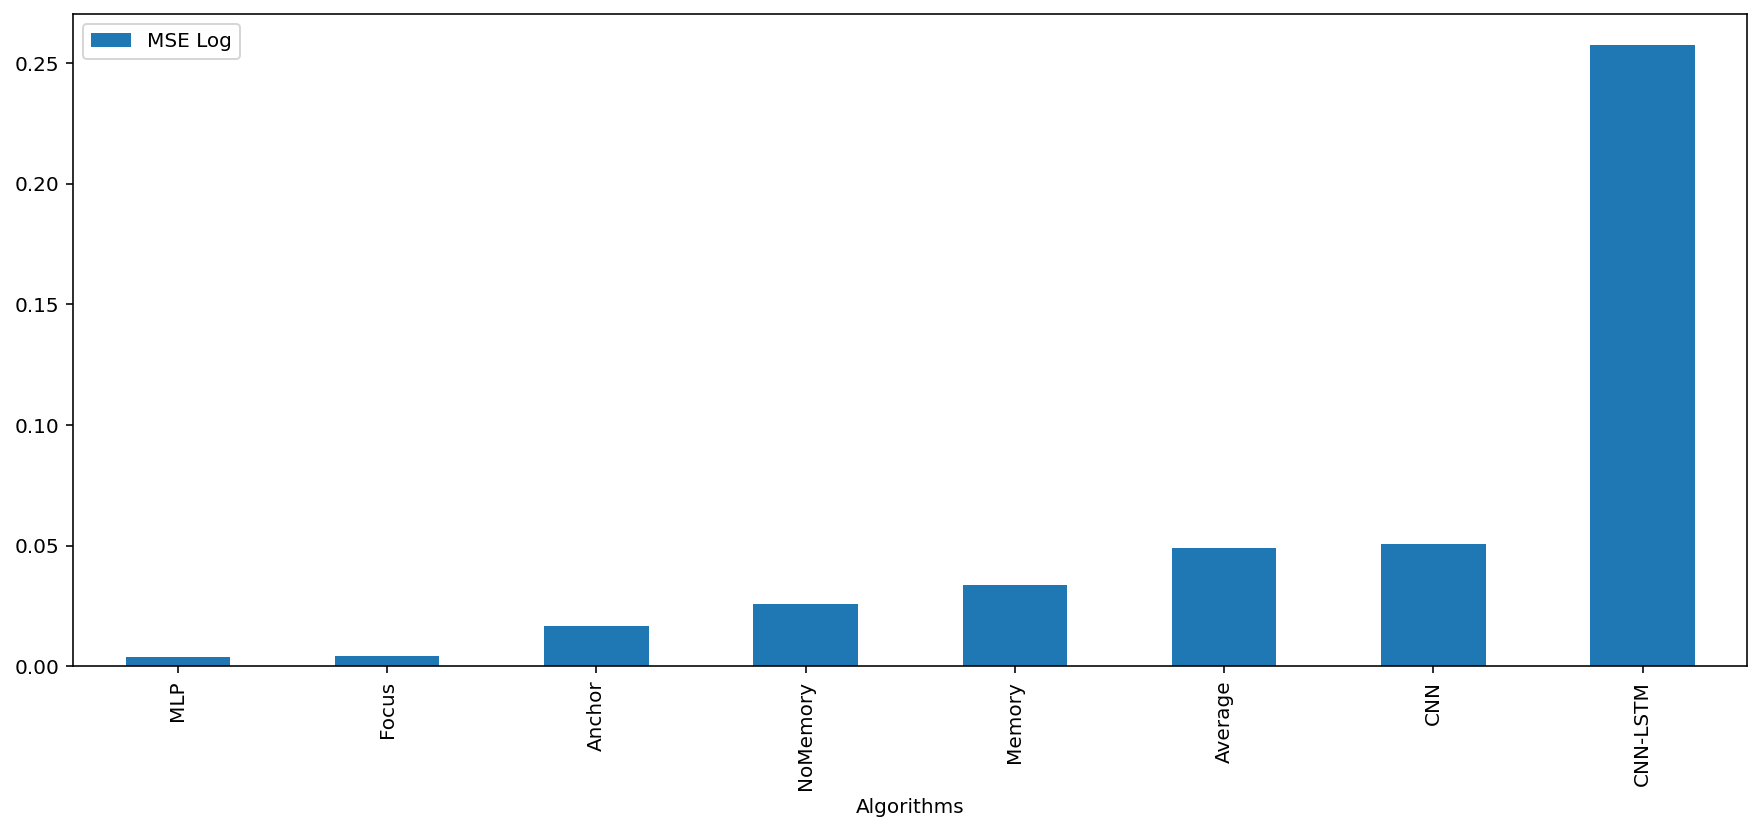

In [61]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [24]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,1.742686
1,NoMemory,1.303642
2,Memory,1.491277
3,Focus,0.548286
4,Anchor,1.030253
5,CNN-LSTM,3.436043
6,MLP,0.519092
7,CNN,1.840424


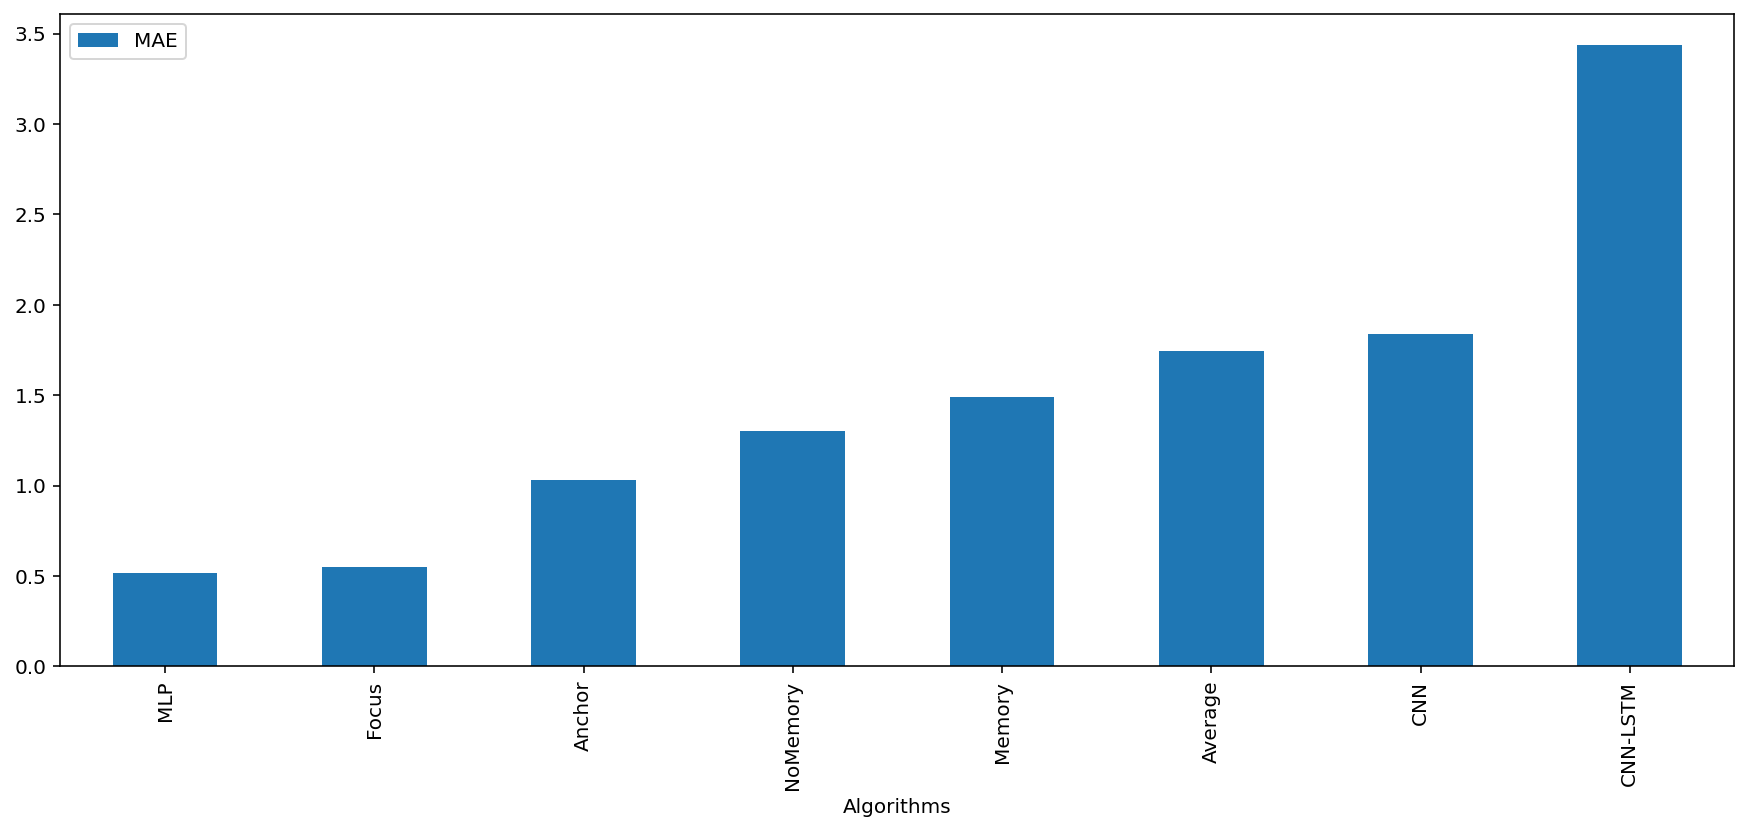

In [62]:
mae = mae_score(all_forecasts, True)
mae

In [26]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

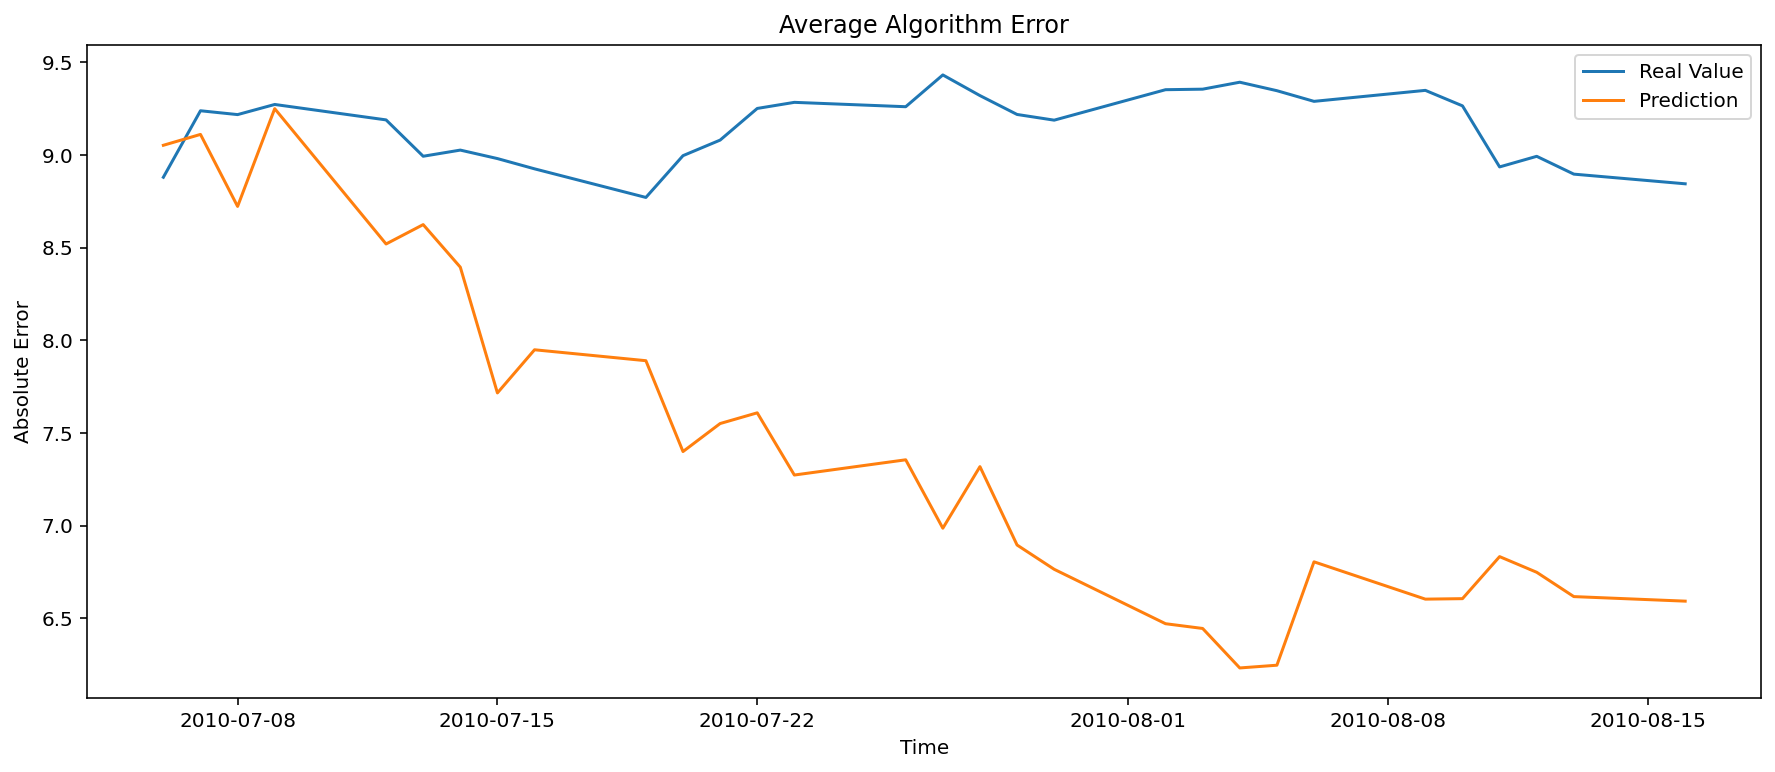

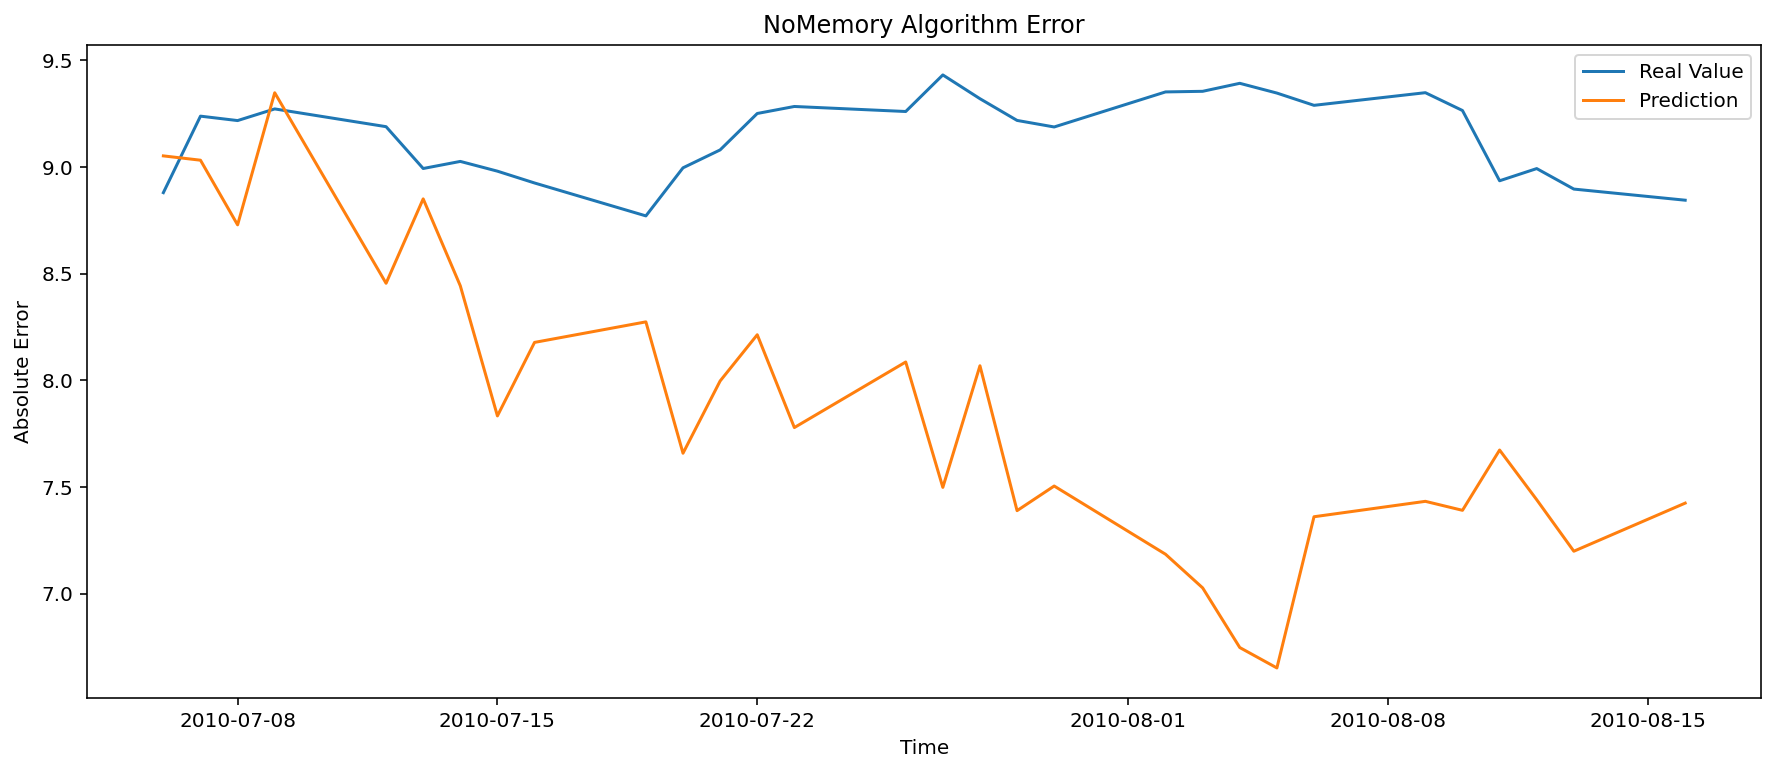

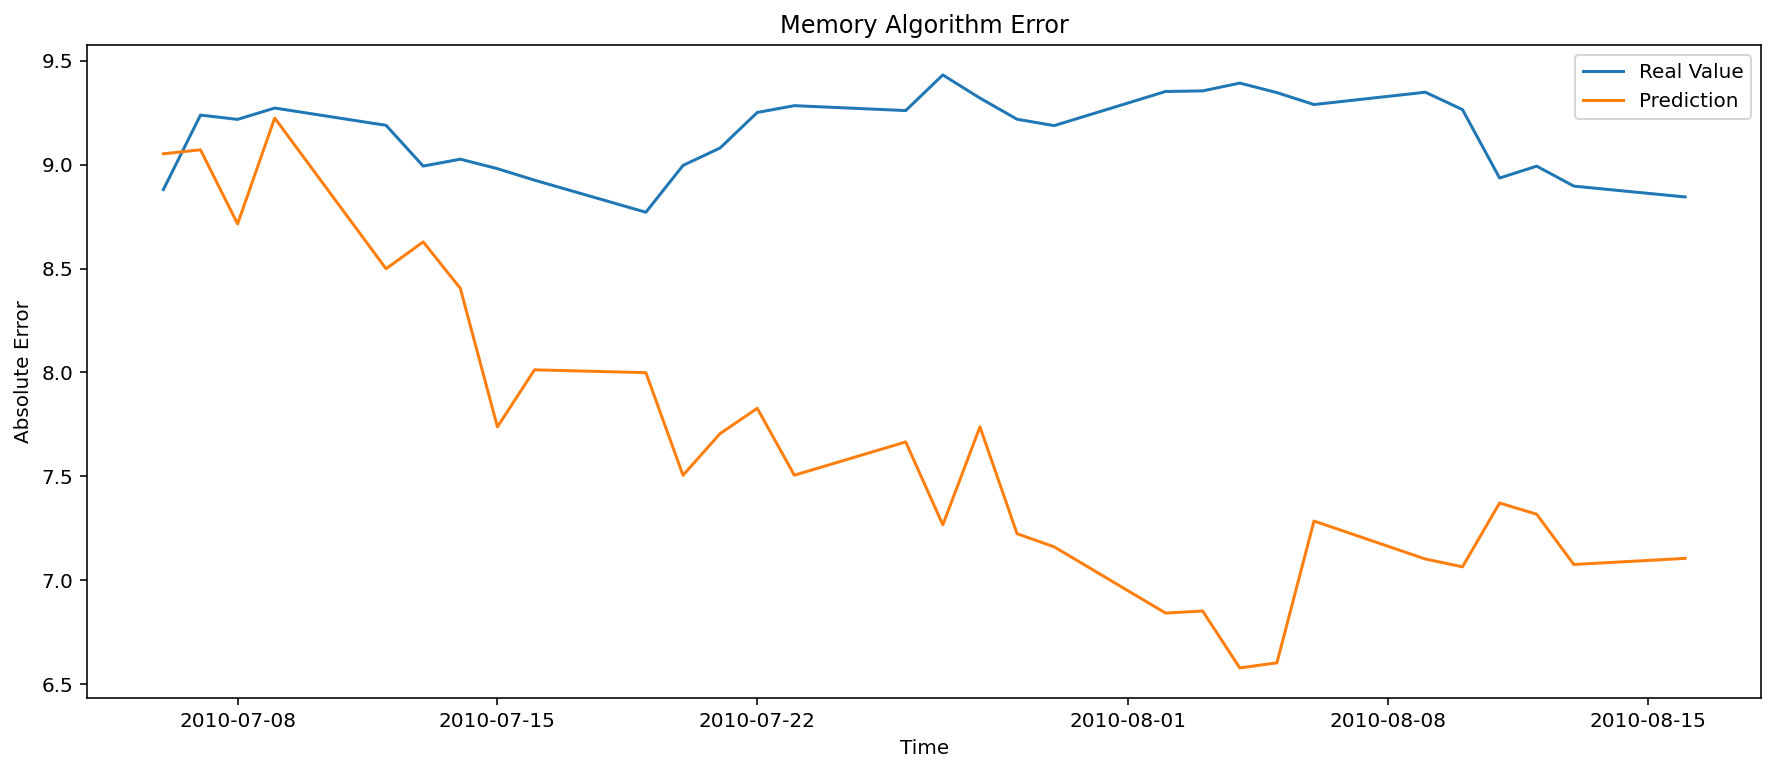

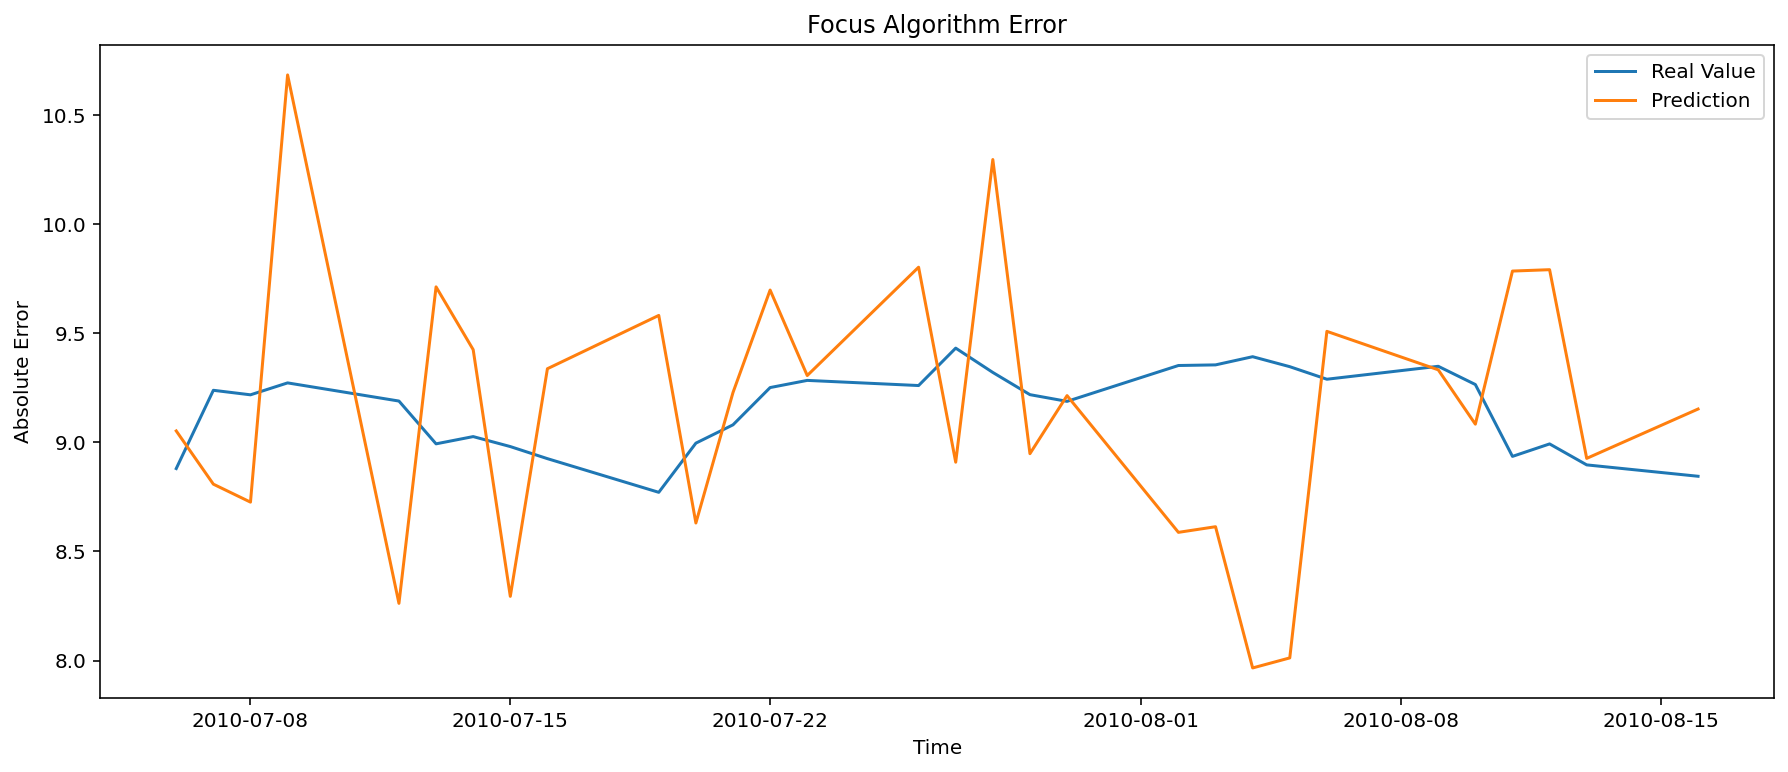

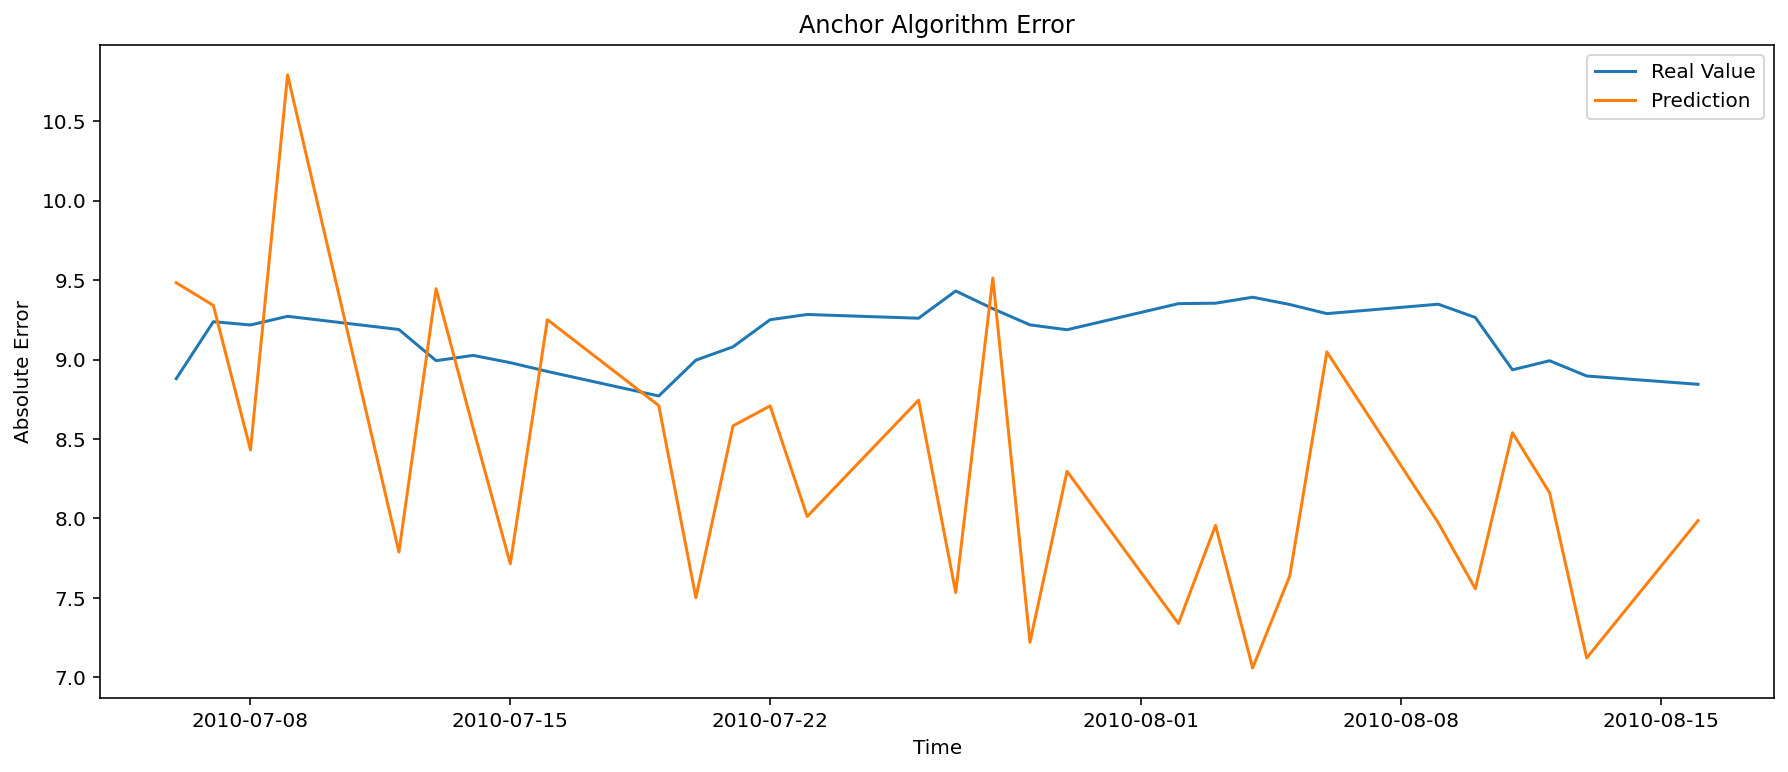

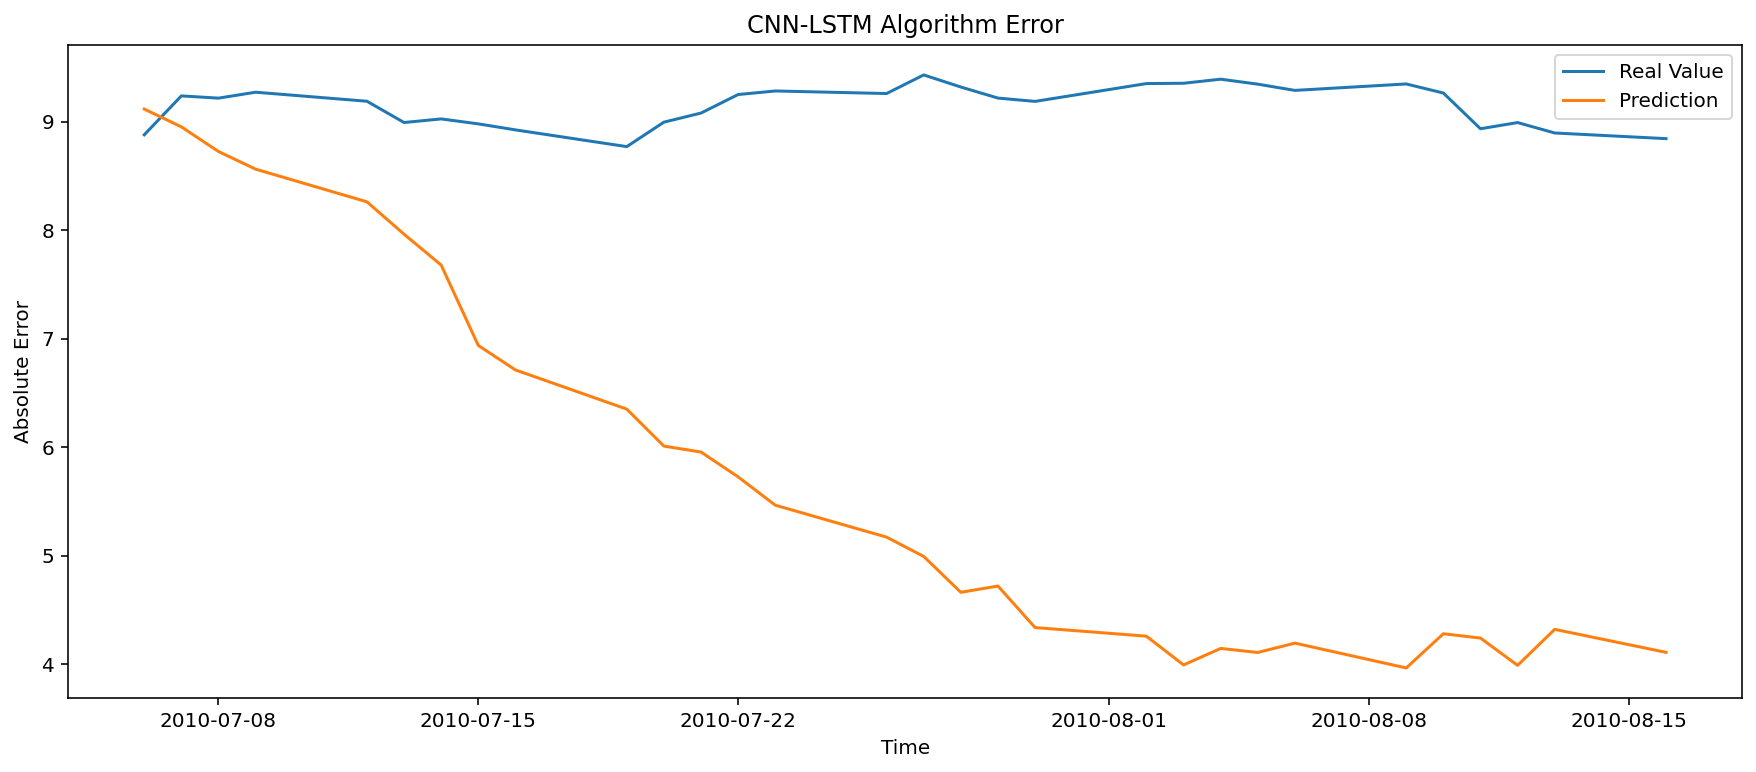

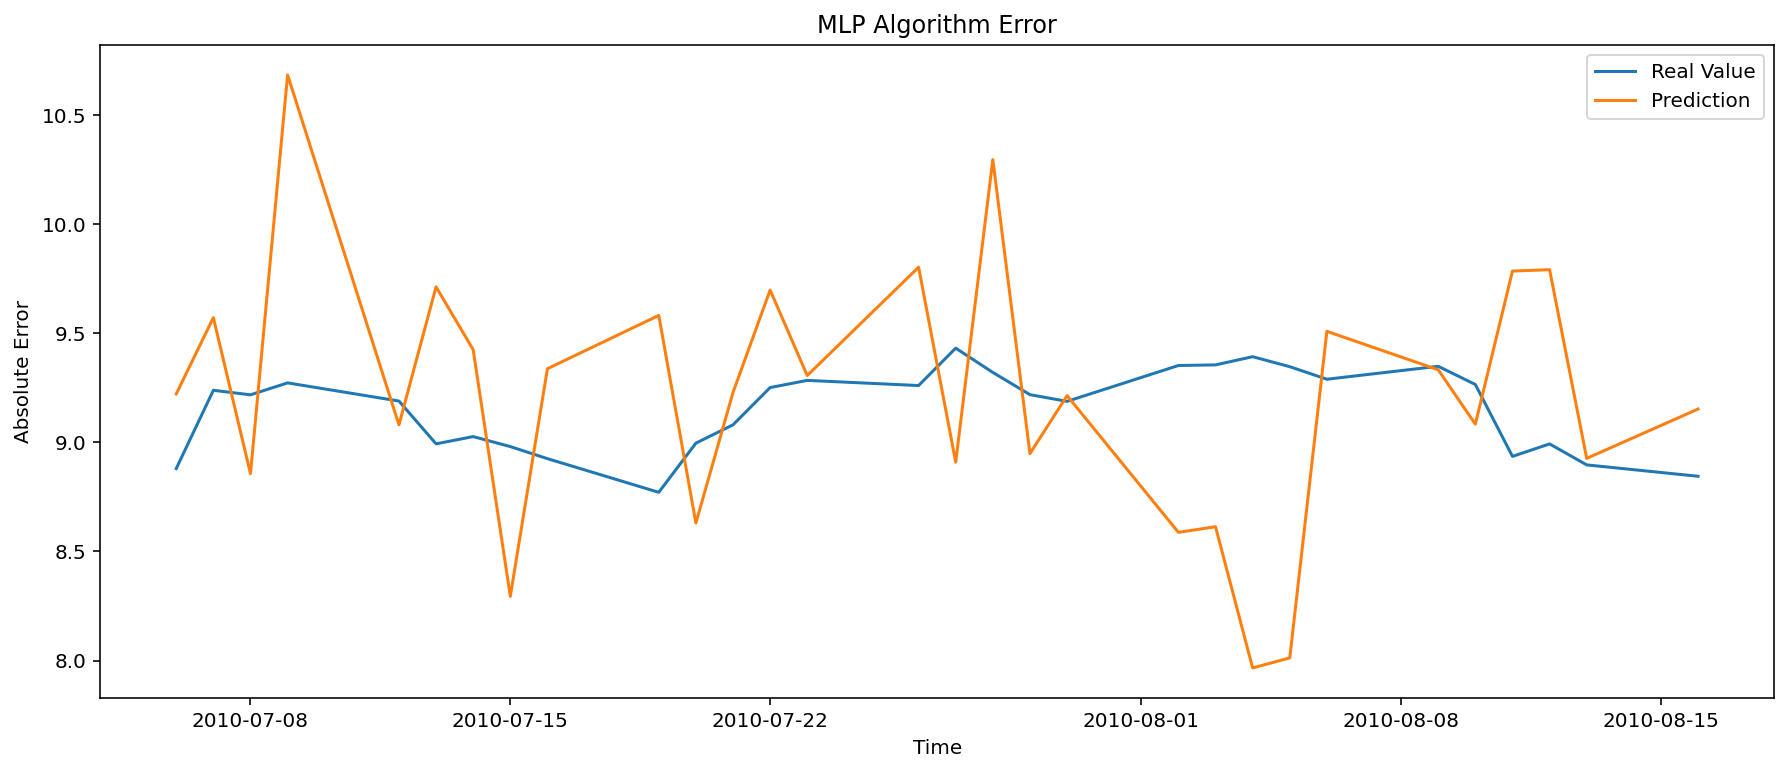

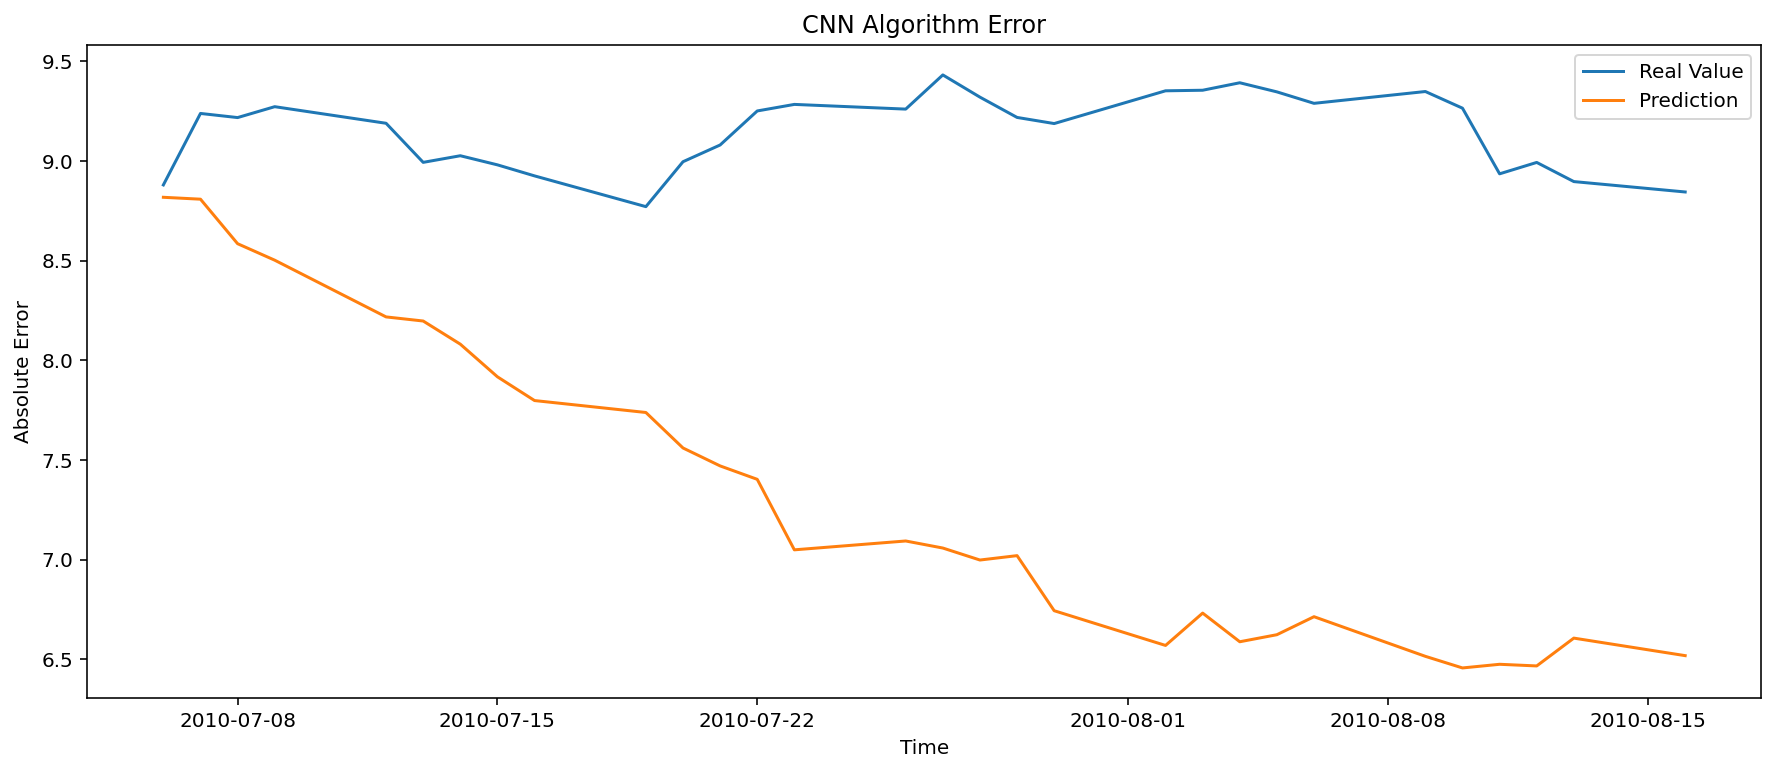

In [63]:
plot_performance(all_forecasts)